In [60]:
import handcalcs.render
import forallpeople
from rjc.jupyter import title_block
forallpeople.environment('structural', top_level=True)
from handcalcs.decorator import handcalc

In [61]:
title_block("VAN.120692.0003", "VAUGHAN PH 3.", "CMF", Member="L02 Diaphragm")

**Project:** VAN.120692.0003<br>
**Project ID:** VAUGHAN PH 3.<br>
**Designer:** CMF<br>
**Date:** 2022-02-02<br>
**Member:** L02 Diaphragm<br>


# Nail Lateral Resistance (O86-19, Cl. 12.9.4)

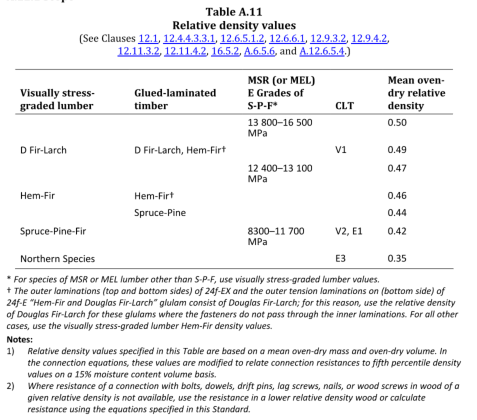

In [62]:
## Inputs

t_1 = 18.5 # Head-side member (plate), mm
t_2 = 26 # Length of penetration into main member, mm
d_F = 5.26 # Nail/spike diameter, mm
G_side = 0.49 # Specific gravity for side member
G_main = 0.49 # SPecific gravity for main member
n_s = 1 # Shear planes in single shear



## Factors # Currently not used in final calc

J_E = 1   #0.67 for end grain nailing, else 1.0
J_A = 1   #0.83 for toe-nailing, else 1.0 (see Cl. 12.9.4.1 for proper toe nailing config)
J_B = 1   # 1.6 for nail clinching, else 1.0
J_D = 1.0 # 1.3 for diaphragm or shearwall nailing, else 1.0
J_X = 1   # 0.9 for CLT, else 1.0

## Inputs

In [63]:
%%render params
t_1 # mm
t_2 # mm
d_F # mm
G_side
G_main
n_s # Single shear

<IPython.core.display.Latex object>

## Embedment Strengths

### $f_1$ - Side member
(On head-side of nail)

In [64]:
%%render
if J_D == 1.3: f_1 = 104 * G_side * (1 - 0.1*d_F) * MPa # Structural panel
elif J_D == 1.0: f_1 = 50 * G_side * (1 - 0.01 * d_F) * J_X * MPa # Lumber or CLT

<IPython.core.display.Latex object>

### $f_2$ - Main member

In [65]:
%%render
f_2 = 50 * G_main * (1 - 0.01 * d_F) * J_X * MPa

<IPython.core.display.Latex object>

### $f_3$ - Main member where fastener is yielding

In [66]:
%%render short
f_3 = 50 * G_main**1.8 * (1 - 0.01 * d_F) * J_X * MPa

<IPython.core.display.Latex object>

### $f_y$ - Nail or spike yield strength

In [67]:
%%render
f_y = 50 * (16 - d_F) * MPa

<IPython.core.display.Latex object>

## Failure Modes

In [68]:
from math import sqrt
d_F = d_F * mm
t_1 = t_1 * mm
t_2 = t_2 * mm

In [69]:
@handcalc(jupyter_display=True)
def yield_a(f_1, d_F, t_1):
    n_u_a = f_1 * d_F * t_1
    return n_u_a

@handcalc(jupyter_display=True)
def yield_b(f_2, d_F, t_2):
    n_u_b = f_2 * d_F * t_2
    return n_u_b

@handcalc(jupyter_display=True)
def yield_c(f_2, d_F, t_2):
    n_u_c = 1/2 * f_2 * d_F * t_2
    return n_u_c

@handcalc(jupyter_display=True)
def yield_d(f_1, f_3, f_y, t_1, d_F):
    n_u_d = f_1 * d_F**2 * (sqrt(1/6 * (f_3/(f_1 + f_3)) * f_y/f_1) + 1/5 * t_1/d_F)
    return n_u_d

@handcalc(jupyter_display=True)
def yield_e(f_1, f_3, f_y, t_2, d_F):
    n_u_e = f_1 * d_F**2 * (sqrt(1/6 * (f_3/(f_1 + f_3)) * f_y/f_1) + 1/5 * t_2/d_F)
    return n_u_e

@handcalc(jupyter_display=True)
def yield_f(f_1, f_3, f_y, t_1, t_2, d_F):
    n_u_f = f_1 * d_F**2 * 1/5 * (t_1/d_F + f_2/f_1 * t_2/d_F)
    return n_u_f

@handcalc(jupyter_display=True)
def yield_g(f_1, f_3, f_y, d_F):
    n_u_g = f_1 * d_F**2 * sqrt(2/3 * (f_3 / (f_1 + f_3)) * f_y/f_1)
    return n_u_g


### Failure mode `a`

In [70]:
n_u_a = yield_a(f_1, d_F, t_1)

<IPython.core.display.Latex object>

### Failure mode `b`

In [71]:
n_u_b = yield_b(f_2, d_F, t_2)

<IPython.core.display.Latex object>

### Failure mode `d`

In [72]:
n_u_d = yield_d(f_1, f_3, f_y, t_1, d_F)

<IPython.core.display.Latex object>

### Failure mode `e`

In [73]:
n_u_e = yield_e(f_1, f_3, f_y, t_2, d_F)

<IPython.core.display.Latex object>

### Failure mode `f`

In [74]:
n_u_f = yield_f(f_1, f_3, f_y, t_1, t_2, d_F)

<IPython.core.display.Latex object>

### Failure mode `g`

In [75]:
n_u_g = yield_g(f_1, f_3, f_y, d_F)

<IPython.core.display.Latex object>

## Calculate $n_r$

In [76]:
failure_modes = {
    n_u_a: "a",
    n_u_b: "b",
    n_u_d: "d",
    n_u_e: "e",
    n_u_f: "f",
    n_u_g: "g",
}


In [77]:
%%render long
n_u = min(n_u_a, n_u_b, n_u_d, n_u_e, n_u_f, n_u_g)

<IPython.core.display.Latex object>

In [78]:
mode_failure = failure_modes[n_u]
ductile = str(mode_failure in ("d", "e", "g"))

In [79]:
%%render
mode_failure
ductile

<IPython.core.display.Latex object>